### Combinatorial Optimization
We can frame many interesting real-world problems such as *vehicle routing, resource allocation, scheduling,* etc. as combinatorial optimization problems. <br>
These are problems defined on N-bit binary strings ($z = z_1,....,z_N$) where the goal is to determine a string that maximizes (/minimizes) a given classical cost function ($C(z) : \{+1, -1\}^N$).

### Quantum Approximate Optimization Algorithm (QAOA)
The Quantum Approximate Optimization Algorithm (QAOA) is a quantum algorithm to tackle these combinatorial optimization problems (https://arxiv.org/abs/1411.4028). <br>
To encode the problem, the classical objective function needs to be converted to a quantum problem Hamiltonian ($H_C$) by promoting each binary variable $z_i$ to a quantum spin $\sigma_i^z$. <br> <br>
$H_C = C(\sigma_1^z,...,\sigma_N^z)$ <br> <br>
To solve an optimization problem with QAOA, we initialize the quantum processor in the superposition state $|+\rangle^{\otimes N}$, and then apply the problem Hamiltonian $H_C$ and a mixing Hamiltonian  ($H_B$ = $\frac{1}{2} \sum_{j=1}^{N} \sigma_i^x$) alternately with controlled durations. This procedure generates a variational wavefunction: <br> <br>
$|{\psi_{p(\gamma,\beta)}}\rangle$ = $e^{-i\beta_pH_B}e^{-i\gamma_pH_C}$ .... $e^{-i\beta_1H_B}e^{-i\gamma_1H_C}|+\rangle^{\otimes N}$ <br> <br>

Here, $\gamma_1$...$\gamma_p$ and $\beta_1$...$\beta_p$ variables denote the duration's of the applied problem Hamiltonian and the mixing Hamiltonian in $p$ different levels of QAOA. One needs to choose $p$ before applying QAOA. Generally, a higher $p$ provides better performance. <br>

Starting with a random set of parameter values, we need to determine the expectation value of $H_C$ in the variational state: <br> <br>
$E_p(\gamma,\beta)$ = $\langle{\psi_{p(\gamma,\beta)}}| H_C | \psi_{p(\gamma,\beta)}\rangle$. <br> <br>
A classical optimizer iteratively updates these variables ($\gamma,\beta$) so as to maximize $E_p(\gamma,\beta)$. Note that, alternate approach exists to find the optimal parameter values classically (https://arxiv.org/abs/1908.08862). <br>

After finding the optimal parameters, we can sample the output variational state with these optimal parameter values. Each sample is a potential solution to the problem. One can evaluate the classical cost function with these samples and pick the sample that provides the best cost as an approximate solution (https://journals.aps.org/prx/abstract/10.1103/PhysRevX.10.021067).


### QAOA-MaxCut (Unweighted Graph)
The Maximum-Cut (MaxCut) problem is a well-known combinatorial optimization problem having practical applications in VLSI design automation (e.g., *cell/macro/pin placement*). <br> 
Problem statement: Given a graph $G = (V, E)$ with nodes $V$ and edges $E$, divide the nodes into two subsets $S_1$ and $S_2$ such that the number of edges between $S_1$ and $S_2$ is maximized. <br>
Classically, if the nodes of a target $N$-node graph are represented by the binary variables \{$z_1$,$z_2$,....,$z_N$\}, an optimization routine maximizes following cost function: <br> <br>
$C(z) = \frac{1}{2}$ $\sum_{(i,j) \in E}^{}$ $C_{ij} (1 - z_{i}z_{j}$) <br>
where $C_{ij}$ = 1 if the nodes are connected and 0 otherwise (unweighted graph). <br> <br>

By promoting the binary variables to quantum spins, we get the following problem Hamiltonian: <br> <br>
$H_C = \frac{1}{2}$ $\sum_{(i,j) \in E}^{}$ $C_{ij} (1 - \sigma_{i}^{z}\sigma_{j}^{z}$)

### Quantum Circuit for QAOA

To generate the variational wavefunction in a quantum processor, one needs to translate the evolution of the system with alternating problem and mixing Hamiltonians into a quantum circuit.

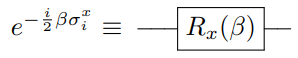

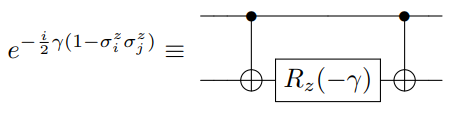

In the follwing figure, we show (i) a toy graph (with 4 nodes and 3 edges) and its MaxCut solution, (ii) the corresponding quantum quantum circuits for QAOA formulation.
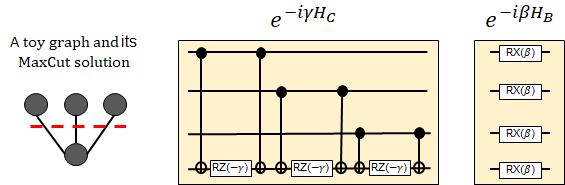

Note that, for every quadratic term in the classical cost function, we have a ZZ-interaction in every level of a QAOA circuit which can be implemented with 2 $CNOT$ and 1 $RZ$ operations. <br> 
The angle of the $RZ$ operation is: (2 x coefficient x $\gamma$). <br>
Furthermore, these ZZ-interactions are commutative within a level of QAOA. In other words, we can re-order these ZZ-interations within a level without affecting the output quantum state. The QAOA compiler (https://github.com/mahabubul-alam/QAOA-Compiler) utilizes this flexibility to perform aggressive optimization of QAOA workloads for target quantum processors.